In [1]:
%matplotlib inline
import pprint as pp
import warnings

import matplotlib.pyplot as plt
import networkx as nx
import nivapy3 as nivapy
import numpy as np
import pandas as pd
import seaborn as sn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import teotil2 as teo

plt.style.use("ggplot")
warnings.simplefilter("ignore")

# TEOTIL2 tutorial 04: Metals

This notebook introduces **TEOTIL2 Metals**, an extension to the TEOTIL2 model developed in November 2020 and capable of simulating fluxes of arsenic (As), cadmium (Cd), copper (Cu), chromium (Cr), lead (Pb), mercury (Hg), nickel (Ni) and zinc (Zn). 

The structure of this tutorial is very similar to that of [Tutorial 02](https://nbviewer.jupyter.org/github/NIVANorge/teotil2/blob/main/notebooks/02_teotil2_nutrients.ipynb), which introduced the more established TEOTIL2 model for nutrients.

#### Disclaimer

TEOTIL2 Metals is very new and should be considered experimental for the time being.

In [2]:
# Year of interest
year = 2019

# Parameters of interest
par_list = ["As", "Cd", "Cr", "Cu", "Hg", "Ni", "Pb", "Zn"]

# Folder containing TEOTIL2 data
data_fold = r"../data/core_input_data"

## 1. Generate an input file

Creating input files for TEOTIL2 Metals is essentially the same as for the nutrients version: use the function `io.make_input_file()`, as shown below, but remember to set `mode='metals'` and pass in your metals of interest in `par_list`. 

**Note:** As with the nutrients version, generating input files requires a direct connection to NIVA's database. If you don't have access to the NIVA network, skip this step and use the pre-built input files in this repository.

In [3]:
# # Connect to db
# eng = nivapy.da.connect()

In [4]:
# # Make input file
# ann_csv = f"../data/norway_annual_input_data/metals_input_data_{year}.csv"
# df = teo.io.make_input_file(year, eng, data_fold, ann_csv, mode='metals', par_list=par_list)

## 2. Run model

Running the model is exactly the same as before.

In [5]:
%%time
# Run model
ann_csv = f"../data/norway_annual_input_data/metals_input_data_{year}.csv"
g = teo.model.run_model(ann_csv)

CPU times: user 13.4 s, sys: 237 ms, total: 13.7 s
Wall time: 13.8 s


## 3. Explore output

The output data structures are also the same - see Tutorials [01](https://nbviewer.jupyter.org/github/NIVANorge/teotil2/blob/main/notebooks/01_teotil2_basics.ipynb) and [02](https://nbviewer.jupyter.org/github/NIVANorge/teotil2/blob/main/notebooks/02_teotil2_nutrients.ipynb) for further details. TEOTIL2 Metals distinguishes **diffuse sources** (principally bedrock weathering and atmospheric depositon) from **point sources** (primarily industrial discharges).

### 3.1. Basic data access

In [6]:
# Catchment ID of interest
reg_id = "028.C22"

# Get local data for catchment
print(f"Local data for '{reg_id}':")
pp.pprint(g.nodes[reg_id]["local"])
print("")

# Get accum data for catchment
print(f"Accumulated data for '{reg_id}':")
pp.pprint(g.nodes[reg_id]["accum"])

Local data for '028.C22':
{'a_reg_km2': 1.57,
 'all_point_as_tonnes': 0.0,
 'all_point_cd_tonnes': 0.0,
 'all_point_cr_tonnes': 0.0,
 'all_point_cu_tonnes': 0.0,
 'all_point_hg_tonnes': 0.0,
 'all_point_ni_tonnes': 0.0,
 'all_point_pb_tonnes': 0.0,
 'all_point_zn_tonnes': 0.0,
 'all_sources_as_tonnes': 0.00017763066054060644,
 'all_sources_cd_tonnes': 2.3379098366150946e-05,
 'all_sources_cr_tonnes': 0.00011588729373179988,
 'all_sources_cu_tonnes': 0.0002371779358729996,
 'all_sources_hg_tonnes': 2.442460738154065e-06,
 'all_sources_ni_tonnes': 0.00018261796531219974,
 'all_sources_pb_tonnes': 0.00037468859553870784,
 'all_sources_zn_tonnes': 0.003891644429231831,
 'diff_as_tonnes': 0.00017763066054060644,
 'diff_cd_tonnes': 2.3379098366150946e-05,
 'diff_cr_tonnes': 0.00011588729373179988,
 'diff_cu_tonnes': 0.0002371779358729996,
 'diff_hg_tonnes': 2.442460738154065e-06,
 'diff_ni_tonnes': 0.00018261796531219974,
 'diff_pb_tonnes': 0.00037468859553870784,
 'diff_zn_tonnes': 0.003891

### 3.2. Network diagrams

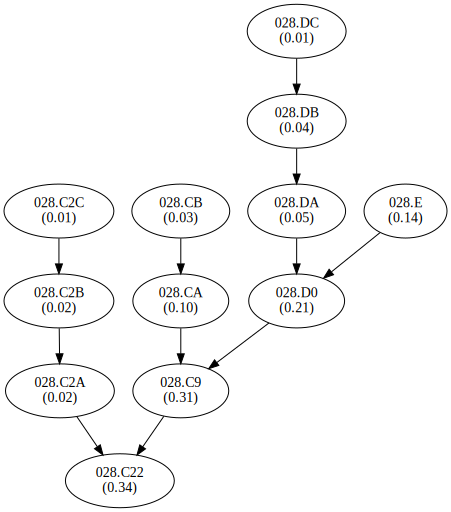

In [7]:
# Plot network labelled with accumulated flow
teo.model.plot_network(g, "028.C22", direct="up", stat="accum", quant="all_sources_zn_tonnes")

### 3.3. Summary maps

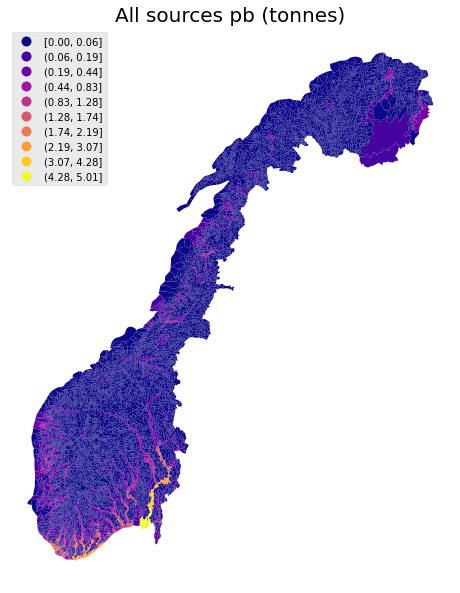

In [8]:
# Summary map
teo.model.make_map(
    g,
    core_fold=r"../data/core_input_data",
    stat="accum",
    quant="all_sources_pb_tonnes",
    trans="none",
    cmap="plasma",
    scheme="natural_breaks",
    n_classes=10,
    #    plot_path=f"../plots/nutrients/accum_all_sources_zn_{year}.png",
)

### 3.4. Write results to CSV

In [9]:
# Save results as csv
out_csv = f"../data/norway_annual_output_data/teotil2_metals_results_{year}.csv"
df = teo.model.model_to_dataframe(g, out_path=out_csv)

df.head()

,regine,regine_ned,accum_all_point_as_tonnes,accum_all_point_cd_tonnes,accum_all_point_cr_tonnes,accum_all_point_cu_tonnes,accum_all_point_hg_tonnes,accum_all_point_ni_tonnes,accum_all_point_pb_tonnes,accum_all_point_zn_tonnes,...,local_runoff_mm/yr,local_trans_as,local_trans_cd,local_trans_cr,local_trans_cu,local_trans_hg,local_trans_ni,local_trans_pb,local_trans_zn,local_vol_lake_m3
0,315.0,315.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,131.943783,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.801058e+06
1,315.,300_315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
2,314.C,314.B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,633.001660,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.274151e+07
3,314.B,314.A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,553.876452,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.697844e+08
4,314.A,314.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,553.876452,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00


## 4. Comparison to observed data

This section compares results from TEOTIL2 Metals to obserevd data collected by Elveovervåkingsprogrammet. This comparison focuses on data from the 20 "main rivers" collected between 2017 and 2019. (Note that the monitoring programme changed in 2016/17, so data for these stations prior to 2017 is more patchy).

In [10]:
# Define period and parameters of interest for TEOTIL2 Metals
st_yr = 2017
end_yr = 2019
par_list = ["As", "Cd", "Cr", "Cu", "Hg", "Ni", "Pb", "Zn"]
data_fold = r"../data/core_input_data"

### 4.1. Read observed data

In [11]:
# Read station data for RID 20 "main rivers"
stn_xlsx = r"../data/metals/rid20_obs_loads/RID_Sites_List_2017-2020.xlsx"
stn_df = pd.read_excel(stn_xlsx, sheet_name="RID_20")
stn_df.head()

,station_id,station_code,station_name,old_rid_group,new_rid_group,ospar_region,station_type,nve_vassdrag_nr,lat,lon,utm_north,utm_east,utm_zone
0,30019,AAGEVEG,Vegårdselva,rid_108,rid_20,SKAGERAK,R,018.A322,58.669996,8.980983,6503307.0,498897.0,32
1,29612,BUSEDRA,Drammenselva,rid_11,rid_20,SKAGERAK,R,012.A3,59.753995,10.008990,6624446.0,556695.0,32
2,29779,FINEALT,Altaelva,rid_11,rid_20,LOFOTEN-BARENTS SEA,R,212.A0,69.900992,23.286977,7759686.0,586586.0,34
3,29819,FINEPAS,Pasvikelva,rid_36,rid_20,LOFOTEN-BARENTS SEA,R,246.A5,69.500996,30.115996,7712884.0,387322.0,36
4,29820,FINETAN,Tanaelva,rid_36,rid_20,LOFOTEN-BARENTS SEA,R,234.B41,70.229993,28.173988,7791949.0,544316.0,35


In [12]:
# Read obs data
obs_csv = f"../data/metals/rid20_obs_loads/rid20_obs_metals_1990-2019.csv"
obs_df = pd.read_csv(obs_csv, sep=";")
del obs_df["Ag_Est"], obs_df["Ag_tonnes"]

# Convert Hg to tonnes
obs_df.set_index(["station_id", "year"], inplace=True)
obs_df["Hg_kg"] = obs_df["Hg_kg"] / 1000
obs_df.rename({"Hg_kg": "Hg_tonnes"}, axis="columns", inplace=True)

# Use just "real" obserbations, not statistical estimates
for par in par_list:
    obs_df[f"{par}_tonnes"] = np.where(
        obs_df[f"{par}_Est"] == 1, np.nan, obs_df[f"{par}_tonnes"]
    )
    del obs_df[f"{par}_Est"]

# Convert to long format
obs_df.reset_index(inplace=True)
obs_df = obs_df.melt(id_vars=["station_id", "year"])
obs_df["variable"] = obs_df["variable"].str.lower()

# Join regine ID
obs_df = pd.merge(
    stn_df[["station_id", "nve_vassdrag_nr"]], obs_df, how="left", on="station_id"
)
obs_df.rename({"nve_vassdrag_nr": "regine"}, inplace=True, axis="columns")
obs_df.dropna(inplace=True)

# If all measured values are at the LOD, the OSPAR methodology estimates fluxes
# as zero, which is not realistic. Only include samples with data above the LOD
obs_df = obs_df.query("value > 0")

# Obs Hg for Glomma in 1998 is wrong - see notebook dev04
obs_df = obs_df.query("~((regine == '002.A51') and (year == 1998) and (variable == 'hg_tonnes'))")
print(len(obs_df))

obs_df.head()

3915


,station_id,regine,year,variable,value
2,30019,018.A322,1992,cd_tonnes,0.015885
3,30019,018.A322,1993,cd_tonnes,0.049939
4,30019,018.A322,1994,cd_tonnes,0.033451
5,30019,018.A322,1995,cd_tonnes,0.028114
6,30019,018.A322,1996,cd_tonnes,0.016254


### 4.2. Run TEOTIL2 Metals

In [13]:
df_list = []
for year in range(st_yr, end_yr + 1):
    print(year)
    # Make input file
    ann_csv = f"../data/norway_annual_input_data/metals_input_data_{year}.csv"
    #     in_df = teo.io.make_input_file(
    #         year, eng, data_fold, ann_csv, mode="metals", par_list=par_list
    #     )

    # Run model
    g = teo.model.run_model(ann_csv)
    mod_df = teo.model.model_to_dataframe(g)

    # Get total fluxes from TEOTIL2
    cols = [f"accum_all_sources_{i.lower()}_tonnes" for i in par_list]
    all_df = mod_df[["regine"] + cols].copy()
    rename_dict = {
        f"accum_all_sources_{i.lower()}_tonnes": f"{i.lower()}_tonnes" for i in par_list
    }
    all_df.rename(rename_dict, axis="columns", inplace=True)
    all_df = all_df.melt(id_vars=["regine"], value_name="teotil2")

    # Get just point sources (i.e. what has been previously reported)
    cols = [f"accum_all_point_{i.lower()}_tonnes" for i in par_list]
    pt_df = mod_df[["regine"] + cols].copy()
    rename_dict = {
        f"accum_all_point_{i.lower()}_tonnes": f"{i.lower()}_tonnes" for i in par_list
    }
    pt_df.rename(rename_dict, axis="columns", inplace=True)
    pt_df = pt_df.melt(id_vars=["regine"], value_name="point_only")

    mod_df = pd.merge(all_df, pt_df, on=["regine", "variable"], how="inner")

    mod_df["year"] = year

    df_list.append(mod_df)

mod_df = pd.concat(df_list, axis="rows")

df = pd.merge(obs_df, mod_df, on=["regine", "year", "variable"], how="inner")
df.rename({"value": "observed"}, axis="columns", inplace=True)

2017
2018
2019


In [14]:
# # Remove Pasvikelva from comparison, if desired (see 'Summary' section below)
# df = df.query("regine != '246.A5'")

### 4.3. Visualise results

The left column of plots in the figure below shows output from the new TEOTIL2 Metals model; the right column is the sum of point inputs only. At the present time, metal fluxes in Norway in unmonitored regions are usually estimated by summing point discharges, so the plots in the right-hand column illustrate the performance of the current default/standard approach.

The x-axis in all plots shows observed fluxes calcuated as part of Elveovervåkingsprogrammet. Data cover the period 2017 to 2019.

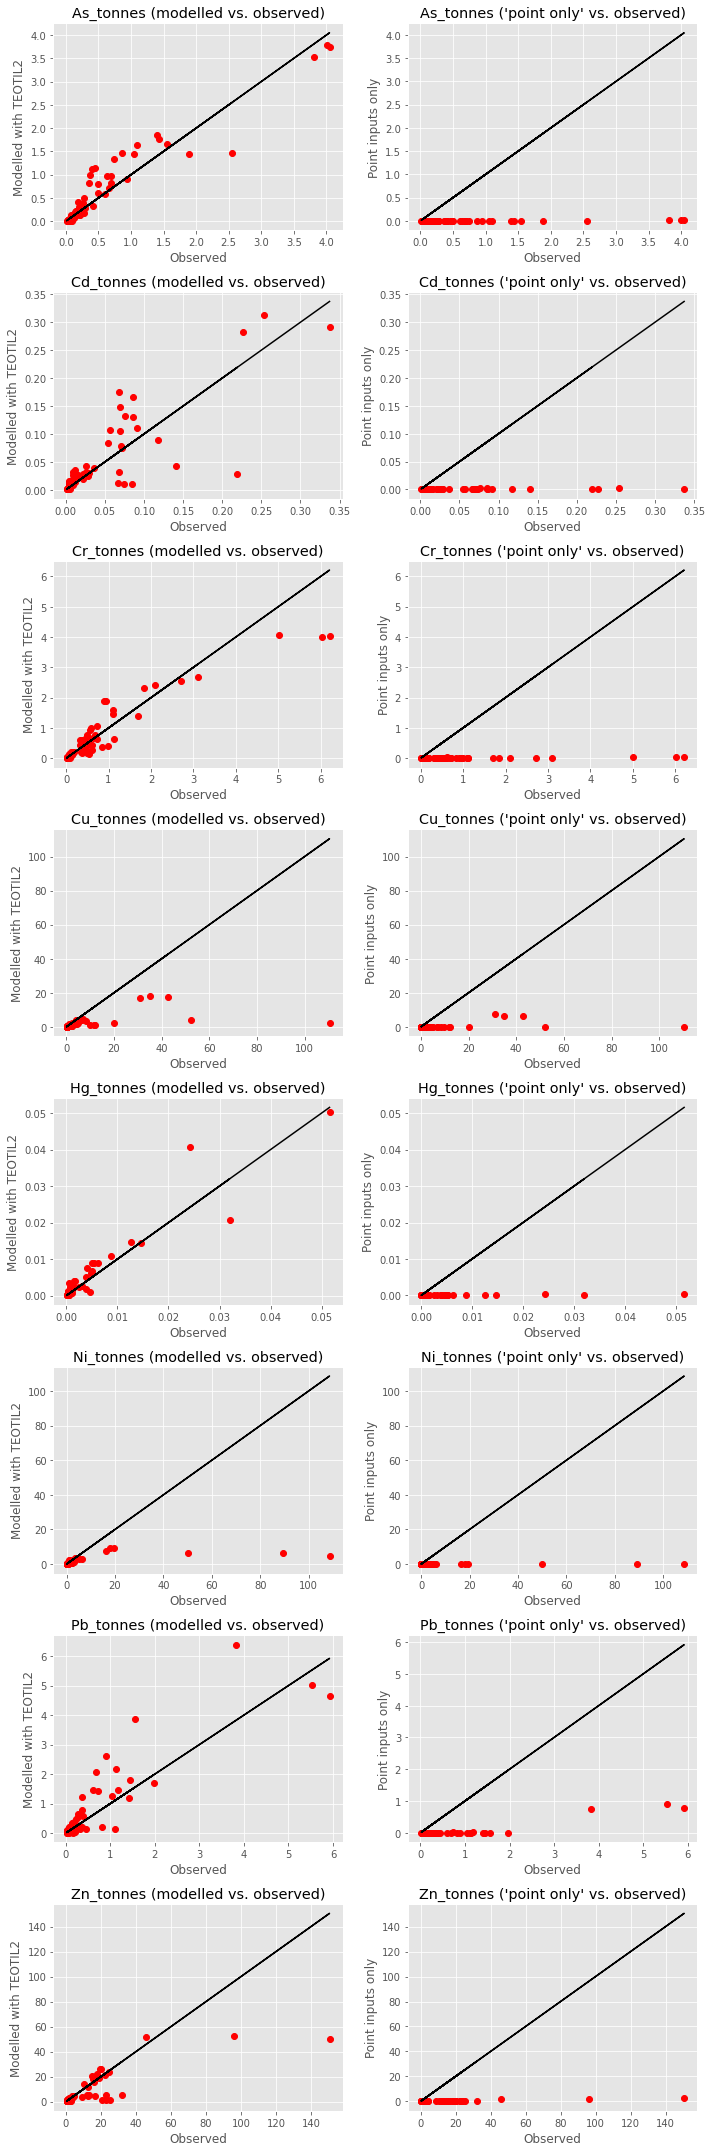

In [15]:
# Scatter plots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10, 30))

for idx, par in enumerate(sorted(df["variable"].unique())):
    par_df = df.query("variable == @par")

    axes[idx, 0].plot(par_df["observed"], par_df["teotil2"], "ro")
    axes[idx, 0].plot(par_df["observed"], par_df["observed"], "k-")
    axes[idx, 0].set_xlabel("Observed")
    axes[idx, 0].set_ylabel("Modelled with TEOTIL2")
    axes[idx, 0].set_title(f"{par.capitalize()} (modelled vs. observed)")

    axes[idx, 1].plot(par_df["observed"], par_df["point_only"], "ro")
    axes[idx, 1].plot(par_df["observed"], par_df["observed"], "k-")
    axes[idx, 1].set_xlabel("Observed")
    axes[idx, 1].set_ylabel("Point inputs only")
    axes[idx, 1].set_title(f"{par.capitalize()} ('point only' vs. observed)")

plt.tight_layout()

png_path = (
    f"../plots/metals/1k_lakes/teotil2_vs_point_only_scatter_{st_yr}-{end_yr}.png"
)
plt.savefig(png_path, dpi=300, bbox_inches="tight")

"Target plots", such as those shown below, are a convenient way of summarising model performance. **Better models plot closer to the centre of the target**. The following is taken from the NivaPy "docstring":

>Target plot comparing normalised bias and normalised, unbiased RMSD between two datasets (usually modelled versus observed). Based on code written by Leah Jackson-Blake for the REFRESH project and described in the REFRESH report as follows:
>    
>    "The y-axis shows normalised bias between simulated and observed. The 
>     x-axis is the unbiased, normalised root mean square difference (RMSD) 
>     between simulated and observed data. The distance between a point and the
>     origin is total RMSD. RMSD = 1 is shown by the solid circle (any point 
>     within this has positively correlated simulated and observed data and 
>     positive Nash Sutcliffe scores); the dashed circle marks RMSD = 0.7 (the 
>     area within this is approximately equal to the area of the outer "donut"). 
>     Normalised, unbiased root mean squared deviation is a useful way of 
>     comparing standard deviations of the observed and modelled datasets."
>
>See Joliff et al. (2009) for full details:
>
>    https://www.sciencedirect.com/science/article/pii/S0924796308001140

**Note:** Reproducing the target plots below requires access to the NivaPy library.

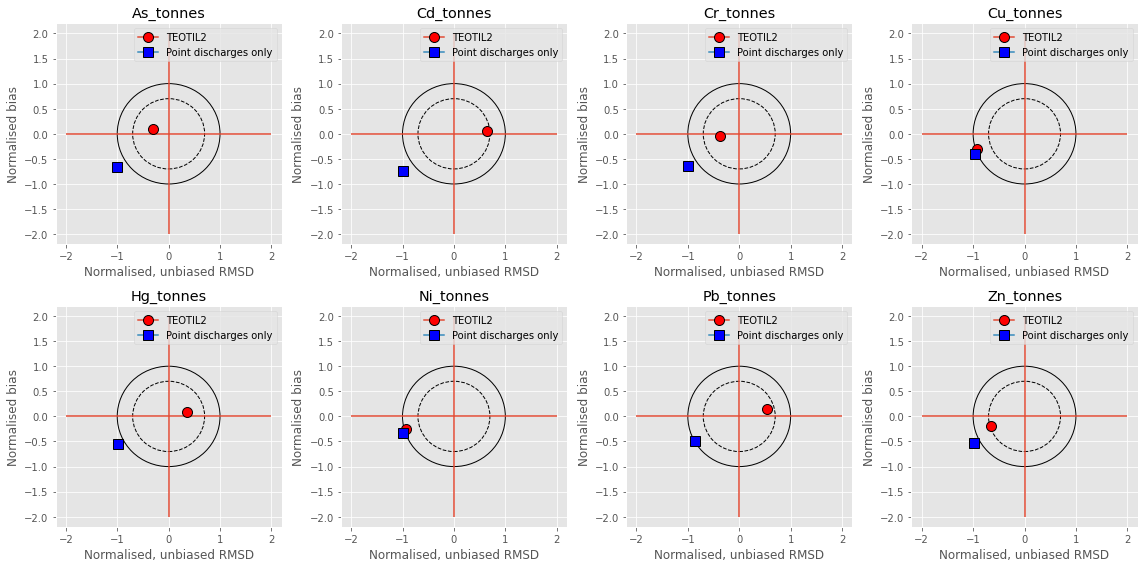

In [16]:
# Target plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for idx, par in enumerate(sorted(df["variable"].unique())):
    par_df = df.query("variable == @par")

    nivapy.plotting.target_plot(
        mod_list=[par_df["teotil2"], par_df["point_only"]],
        obs_list=[par_df["observed"], par_df["observed"]],
        labels=["TEOTIL2", "Point discharges only"],
        markers=["o", "s"],
        colours=["r", "b"],
        ax=axes[idx],
        title=par.capitalize(),
    )

plt.tight_layout()

png_path = f"../plots/metals/1k_lakes/teotil2_vs_point_only_target_{st_yr}-{end_yr}.png"
plt.savefig(png_path, dpi=300, bbox_inches="tight")

In [17]:
# OLS linear regression
data_dict = {
    "par": [],
    "slope": [],
    "R2": [],
    "pval": [],
}
for idx, par in enumerate(sorted(df["variable"].unique())):
    par_df = df.query("variable == @par")

    mod = smf.ols(formula="observed ~ teotil2 - 1", data=par_df)
    res = mod.fit()

    data_dict["par"].append(par)
    data_dict["slope"].append(res.params[0])
    data_dict["R2"].append(res.rsquared)
    data_dict["pval"].append(res.pvalues[0])

    print(
        f"\n###############################################################################################"
    )
    print(f"# {par.capitalize()}\n")
    print(res.summary())
    print(
        f"\n###############################################################################################\n"
    )

res_df = pd.DataFrame(data_dict)


###############################################################################################
# As_tonnes

                                 OLS Regression Results                                
Dep. Variable:               observed   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              788.1
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                    7.86e-36
Time:                        10:06:24   Log-Likelihood:                         -10.790
No. Observations:                  60   AIC:                                      23.58
Df Residuals:                      59   BIC:                                      25.67
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
          

In [18]:
# Results summary
res_df

,par,slope,R2,pval
0,as_tonnes,0.953198,0.930352,7.864022e-36
1,cd_tonnes,0.820500,0.770896,1.357727e-18
2,cr_tonnes,1.154359,0.912444,6.781165e-33
3,cu_tonnes,2.440881,0.321654,1.883029e-06
4,hg_tonnes,0.895022,0.911011,5.745510e-20
5,ni_tonnes,4.590255,0.398189,4.994785e-08
6,pb_tonnes,0.774640,0.827522,3.451275e-24
7,zn_tonnes,1.518941,0.724251,3.777776e-18


## 5. Summary

For six out of eight metals, the performance of TEOTIL2 Metals seems promising: **all relationships are highly significant** ($p << 0.05$); the **slopes of the relationships are close to 1 with zero intercept**; and $R^2$ is in the range from **72 to 93%**. The target and scatter plots above also demonstrate that the new model is substantially better than the default approach of simply summing point discharges.

On the other hand, model performance is poor for copper and nickel. Although these relationships are still statistically significant, $R^2$ values are below 40% and the regression slopes are larger than 1, indicating the model is underestimating fluxes. For these two metals, the new model is only marginally better than the old/default approach. Further investigation reveals that most of the "outlier" points on the plots with high observed fluxes of Cu and Ni are actually from a single river - the Pasvikelva (regine 246.A5), which is located in the far north of the country close to the Russian border. The vast majority of the Pasvikelva catchment is situated in Finland and Russia and there are extensive nickel mining activities in this region, as well as a large nickel smelter just across the Russian border (less than 15 km upstream of the water sampling location). Copper- and nickel-rich runoff from the mines and smelting works are known to pose a significant environmental problem in this area, with discharges are transported via Koloselva to Kuetsjärvi and then across the Norwegian border into Pasvikelva (see [here](http://www.pasvikmonitoring.org/norja/paatsjoentila_n.html) for details). 

Since the database used to generate input files for TEOTIL Metals only includes Norwegian data, it is not surprising that fluxes of copper and nickel are undrestimated in this region. If Pasvikelva is removed from the model comparison, performance for copper and nickel improves substantially: both target plots show total normalised $RMSD < 0.7$ (i.e. within the inner circle) and $R^2$ values increase to around 90%. Given the scope of TEOTIL Metals and the difficulty of obtaining point discharge data for non-Norwegian regions, these performance metrics seem acceptable.